<a href="https://colab.research.google.com/github/rvalienter90/UCF/blob/master/CAP-5610_MACHINE%20LEARNING/HW2/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***RODOLFO VALIENTE ROMERO***

#HW 2

** *Code is based on course notes and was used code from the Colab examples**

The goal of this homework is to create a convolutional neural network for the CIFAR10 data set. 
See [this colab notebook](https://colab.research.google.com/drive/1LZZviWOzvchcXRdZi2IBx3KOpQOzLalf) how to load the CIFAR data in Keras.

You should not use any pretrained convnets that come with Keras. You have to create and train your own convnets with Keras from scratch.

** Simple hold-out validation**

Make sure that the data is divided into: 

- training set (80%)
- validation set (20%)
- test set. 

Use the training set to train your neural networks. Evaluate their performance on the validation data set. 

After trying several different architectures, choose the one that performs
best of the validation set. Try at least four different architectures by using data augmentation, using dropout, varying the number of layers, the number of filters, etc.

Train this final architecture on the data from the training set and validation set and evaluate its performance on 
the test set.

** k-fold validation**

Reevaluate your best architecture using k-fold validation with k=5, that is, the size of the validation fold is 20%. Does the accuracy/loss obtain by k-fold validation differ from the accuracy/loss obtain by simple hold-out validation.


## Loading the image data CIFAR10 data set and functions

In [0]:
from keras.datasets import cifar10
from keras import layers, models,optimizers,regularizers
from keras.utils import np_utils
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

from google.colab import files
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
 

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
test_images_norm = (test_images/255).astype('float32')
test_labels_norm = np_utils.to_categorical(test_labels, 10)

In [0]:
# models
def M1():
  #model simpler

  model = models.Sequential()
  # conv layers
  # 1
  model.add(layers.Conv2D(16, (3, 3),activation='relu', input_shape=(32, 32, 3)))
  # 2
  model.add(layers.Conv2D(32, (3, 3),activation='relu'))
  # dense layers
  model.add(layers.Flatten())
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.summary()
  return model

def M2():
  #Deeper model M2 (M1 + more layers)
  model = models.Sequential()
  # conv layers
  # 1
  model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  # 2
  model.add(layers.Conv2D(32, (3, 3), activation='relu'))
  # 3
  model.add(layers.Conv2D(32, (3, 3), activation='relu'))
  # 4
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  # dense layers
  model.add(layers.Flatten())
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.summary()
  return model

def M2_1():
  #M2 with more filters + matpooling + same pading - M2_1 
  model = models.Sequential()
  # conv layers
  # 1
  model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D(2, 2))
  # 2
  model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
  model.add(layers.MaxPooling2D(2, 2))
  # 3
  model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
  model.add(layers.MaxPooling2D(2, 2))
  # 4
  model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(layers.MaxPooling2D(2, 2))
  # dense layers
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.summary()
  return model


def M2_2():
  #M2_1  + batch normalization
  model = models.Sequential()
  # conv layers
  # 1
  model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 3)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 2
  model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 3
  model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 4
  model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # dense layers
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(10, activation='softmax'))
  model.summary()
  return model


def M2_3():
  #M2_2  + strides  -M2_3
  model = models.Sequential()
  # conv layers
  # 1
  model.add(layers.Conv2D(32, (3, 3), strides = (1,1),activation='relu',padding='same', input_shape=(32, 32, 3)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 2
  model.add(layers.Conv2D(64, (3, 3), strides = (1,1),activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 3
  model.add(layers.Conv2D(64, (3, 3), strides = (2,2),activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 4
  model.add(layers.Conv2D(128, (3, 3),strides = (1,1), activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))

  # dense layers
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(10, activation='softmax'))
  model.summary()
  return model


def M2_4():
  #M2_2  + dropout -M2_4
  model = models.Sequential()
  # conv layers
  # 1
  model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 3)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 2
  model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 3
  model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 4
  model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # dense layers
  model.add(layers.Flatten())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.5))
  #model.add(layers.BatchNormalization())
  model.add(layers.Dense(10, activation='softmax'))
  model.summary()
  return model

def M2_5():
  #M2_2  + weight_regularization
  weight_decay = 1e-4
  model = models.Sequential()
  # conv layers
  # 1
  model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', kernel_regularizer= regularizers.l2(weight_decay), input_shape=(32, 32, 3)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 2
  model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same', kernel_regularizer= regularizers.l2(weight_decay)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 3
  model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same', kernel_regularizer= regularizers.l2(weight_decay)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 4
  model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same', kernel_regularizer= regularizers.l2(weight_decay)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # dense layers
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(10, activation='softmax'))
  model.summary()
  return model


def M2_6():
  #M2_4  +more conv layers
  model = models.Sequential()
  # conv layers
  # 1
  model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same'))
  model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 2
  model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 3
  model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 4
  model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # dense layers
  model.add(layers.Flatten())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(0.5))
  #model.add(layers.BatchNormalization())
  model.add(layers.Dense(10, activation='softmax'))
  model.summary()
  return model

def M2_7():
  model = models.Sequential()
  model.add(layers.Conv2D(64, (3,3), activation="relu", padding='same', input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(64, (3,3), activation="relu", padding='same'))
  model.add(layers.Conv2D(64, (3,3), activation="relu"))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D())

  model.add(layers.Conv2D(128, (3,3), activation="relu", padding='same'))
  model.add(layers.Conv2D(128, (3,3), activation="relu", padding='same'))
  model.add(layers.Conv2D(128, (3,3), activation="relu"))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D())

  model.add(layers.Dropout(0.5))

  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation="relu"))
  model.add(layers.Dense(10, activation="softmax"))
  model.summary()
  return model

def model_basic():
  model = models.Sequential()
  # conv layers
  # 1
  model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D(2, 2))
  # 2
  model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
  model.add(layers.MaxPooling2D(2, 2))
  # 3
  model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(layers.MaxPooling2D(2, 2))
  # 4
  model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(layers.MaxPooling2D(2, 2))
  # dense layers
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.summary()
  return model


def model_basic_batchnorm():

  model = models.Sequential()
  # conv layers
  # 1
  model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 3)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 2
  model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 3
  model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 4
  model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # dense layers
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(10, activation='softmax'))
  model.summary()
  return model

def model_basic_batchnorm_strides():

  model = models.Sequential()
  # conv layers
  # 1
  model.add(layers.Conv2D(32, (3, 3), strides = (1,1),activation='relu',padding='same', input_shape=(32, 32, 3)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 2
  model.add(layers.Conv2D(64, (3, 3), strides = (1,1),activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 3
  model.add(layers.Conv2D(128, (3, 3), strides = (2,2),activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 4
  model.add(layers.Conv2D(128, (3, 3),strides = (1,1), activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))

  # dense layers
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(10, activation='softmax'))
  model.summary()
  return model


def model_simpler():

  model = models.Sequential()
  # conv layers
  # 1
  model.add(layers.Conv2D(32, (3, 3),activation='relu',padding='same', input_shape=(32, 32, 3)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 2
  model.add(layers.Conv2D(32, (3, 3),activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # dense layers
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(10, activation='softmax'))
  model.summary()
  return model

def split_data(train_images,train_labels):
  indxs = np.random.permutation(len(train_images))

  val_indx = indxs[0:10000]
  train_indx = indxs[10000:]

  val_images, val_labels = train_images[val_indx], train_labels[val_indx]

  train_images_split, train_labels_split = train_images[train_indx], train_labels[train_indx]
  train_images_norm = (train_images_split/255).astype('float32')
  train_labels_norm = np_utils.to_categorical(train_labels_split, 10)

  val_images_norm = (val_images/255).astype('float32')
  val_labels_norm = np_utils.to_categorical(val_labels, 10)
  return (train_images_norm,train_labels_norm,val_images_norm,val_labels_norm)


def model_compile_and_fit(model,train_images_norm,train_labels_norm,val_images_norm,val_labels_norm,name,bs= 64,e=20):
  model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['acc']
  )
  history = model.fit(train_images_norm, train_labels_norm, batch_size= bs, epochs= e,
                      verbose=1, validation_data=(val_images_norm, val_labels_norm))
  
  
  file_name = '%s.h5'% name
  #file_name_w = 'model_w_hold_out_%s.h5'% name
  #model.save_weights(file_name_w)
  model.save(file_name)
  #files.download(file_name)
 
  
  return (history,file_name)

def model_compile_and_fitgenerator(model,train_images_norm,train_labels_norm,val_images_norm,val_labels_norm,name,datagen,bs= 64,e=20):
  
  
  model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['acc']
  )
  history = model.fit_generator(
      datagen.flow(train_images_norm, train_labels_norm, batch_size=bs),
      validation_data=(val_images_norm, val_labels_norm),
      steps_per_epoch=100,
      epochs=e,
      #use_multiprocessing=True,
      #workers=4,
      verbose=2
  )

  
  
  file_name = '%s.h5'% name
  #file_name_w = 'model_w_hold_out_%s.h5'% name
  #model.save_weights(file_name_w)
  model.save(file_name)
  #files.download(file_name)
 
  
  return (history,file_name)


def model_compile_RMS(model):
  model.compile(
      loss='categorical_crossentropy', 
      optimizer=optimizers.RMSprop(lr=1e-4),
      metrics=['acc']
  )
  return model

def model_compile_adam(model):
  model.compile(
      loss='categorical_crossentropy', 
      optimizer='adam',
      metrics=['acc']
  )
  return model


def model_download_evaluate(file_name,test_images_norm,test_labels_norm):
  if file_name=="model_hold_out_simpler.h5":
   !wget  https://github.com/rvalienter90/UCF/blob/master/CAP-5610_MACHINE%20LEARNING/HW2/model_hold_out_simpler.h5?raw=true \
    -O model_hold_out_simpler.h5
  
 
  model=load_model(file_name)
  loss,acc = model.evaluate(test_images_norm, test_labels_norm)
  print("Restored model, accuracy: {:5.2f}%".format(100*acc))
  
  return (loss,acc)

def model_download_getmetrics(file_name,train_images_norm,train_labels_norm,val_images_norm,val_labels_norm):
  if file_name=="model_hold_out_simpler.h5":
   !wget  https://github.com/rvalienter90/UCF/blob/master/CAP-5610_MACHINE%20LEARNING/HW2/model_hold_out_simpler.h5?raw=true \
    -O model_hold_out_simpler.h5
  
 
  model=load_model(file_name)
  #test_loss,test_acc = model.evaluate(test_images_norm, test_labels_norm)
  train_loss,train_acc = model.evaluate(train_images_norm, train_labels_norm)
  val_loss,val_acc = model.evaluate(val_images_norm,val_labels_norm)
  #print("Restored model, accuracy: {:5.2f}%".format(100*test_acc))
  
  return (train_loss,train_acc,val_loss,val_acc)

def model_load_evaluate(file_name,test_images_norm,test_labels_norm):
 
  model=load_model(file_name)
  loss,acc = model.evaluate(test_images_norm, test_labels_norm)
  print("Model, accuracy: {:5.2f}%".format(100*acc))
  
  return (loss,acc)

def model_plot(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  # training and validation accuracy

  plt.plot(epochs, acc, 'bo', label='training acc')
  plt.plot(epochs, val_acc, 'b', label='validation acc')
  plt.title('training and validation accuracy')
  plt.legend()

  plt.figure()

  # training and validation loss

  plt.plot(epochs, loss, 'bo', label='training loss')
  plt.plot(epochs, val_loss, 'b', label='validation loss')
  plt.title('training and validation loss')
  plt.legend()

  plt.show()
  

###Explore data

In [0]:
print(train_images.shape)
print(len(train_images))
print(train_images.ndim)
print(train_images.dtype)
print(train_labels)
print(train_labels.shape)
print(len(train_labels))

(50000, 32, 32, 3)
50000
4
uint8
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
(50000, 1)
50000


### Displaying 

In [0]:
import matplotlib.pyplot as plt
class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = 0
image = train_images[index]

(32, 32, 3)


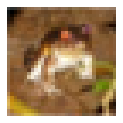

In [0]:
print(image.shape)
plt.figure(figsize=(2, 2))
plt.grid(None)
plt.xticks([])
plt.yticks([])
plt.imshow(image)
plt.show()

In [0]:
label = train_labels[index, 0]
print(label)
print(class_names[label])

6
frog


In [0]:
table = [[] for _ in range(10)]
for i in range(len(train_images)):
  label = train_labels[i, 0]
  table[label].append(i)

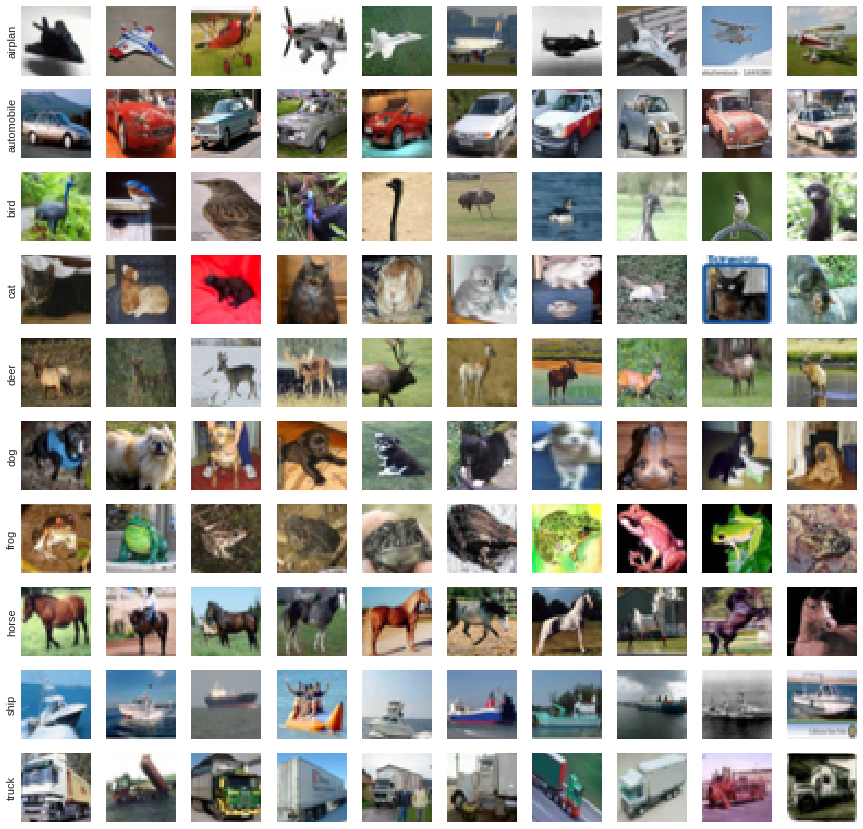

In [0]:
plt.figure(figsize=(15,15))
for class_index in range(10):
  for example_index in range(10):
    plt.subplot(10, 10, class_index * 10 + example_index + 1)
    plt.xticks([])
    plt.yticks([])
    if example_index == 0:
      plt.ylabel(class_names[class_index], rotation=90)
    plt.grid(False)
    plt.imshow(train_images[table[class_index][example_index]], cmap=plt.cm.binary)
plt.show()

In [0]:
#split data
import numpy as np
from keras.utils import np_utils
indxs = np.random.permutation(len(train_images))

val_indx = indxs[0:2000]
train_indx = indxs[2000:]

val_images, val_labels = train_images[val_indx], train_labels[val_indx]

train_images_split, train_labels_split = train_images[train_indx], train_labels[train_indx]

In [0]:
train_images_norm = (train_images_split/255).astype('float32')
train_labels_norm = np_utils.to_categorical(train_labels_split, 10)

val_images_norm = (val_images/255).astype('float32')
val_labels_norm = np_utils.to_categorical(val_labels, 10)

test_images_norm = (test_images/255).astype('float32')
test_labels_norm = np_utils.to_categorical(test_labels, 10)

## 1-Simple hold-out validation

Make sure that the data is divided into: 

- training set (80%)
- validation set (20%)
- test set. 

Use the training set to train your neural networks. Evaluate their performance on the validation data set. 

After trying several different architectures, choose the one that performs
best of the validation set. Try at least four different architectures by using data augmentation, using dropout, varying the number of layers, the number of filters, etc.

Train this final architecture on the data from the training set and validation set and evaluate its performance on 
the test set.

### Buil a simpler model


In [0]:
(train_images_norm,train_labels_norm,val_images_norm,val_labels_norm)=split_data(train_images,train_labels)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_32 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
batch_normalization_33 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1568)              0         
__________

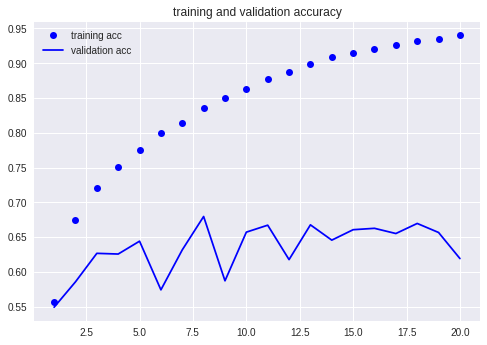

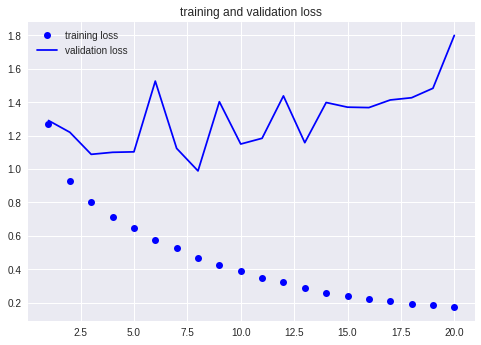

In [0]:
notrained=1
if notrained:
  model=model_simpler()
  (history,file_name)=model_compile_and_fit(model,train_images_norm,train_labels_norm,val_images_norm,val_labels_norm,'simpler',64,20)
  #files.download(file_name)
  model_load_evaluate(file_name,test_images_norm,test_labels_norm)
  model_plot(history)
else:
  file_name='model_hold_out_simpler.h5'
  model_download_evaluate(file_name,test_images_norm,test_labels_norm)

### Build a small convnet

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
# conv layers
# 1
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(2, 2))
# 2
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D(2, 2))
# 3
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D(2, 2))
# 4
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D(2, 2))
# dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 4, 4, 128)         147584    
__________

In [0]:
from keras import optimizers

model.compile(
    loss='categorical_crossentropy', 
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc']
)

In [0]:
history = model.fit(train_images_norm, train_labels_norm, batch_size= 64, epochs= 20,
                    verbose=1, validation_data=(val_images_norm, val_labels_norm))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 2000 samples
Epoch 1/20
48000/48000 [==============================] - 17s 346us/step - loss: 1.8536 - acc: 0.3312 - val_loss: 1.6311 - val_acc: 0.4255
Epoch 2/20
48000/48000 [==============================] - 12s 240us/step - loss: 1.5424 - acc: 0.4449 - val_loss: 1.4677 - val_acc: 0.4740
Epoch 3/20
48000/48000 [==============================] - 12s 240us/step - loss: 1.4181 - acc: 0.4920 - val_loss: 1.4060 - val_acc: 0.4940
Epoch 4/20
48000/48000 [==============================] - 12s 240us/step - loss: 1.3332 - acc: 0.5267 - val_loss: 1.3255 - val_acc: 0.5295
Epoch 5/20
48000/48000 [==============================] - 11s 239us/step - loss: 1.2616 - acc: 0.5516 - val_loss: 1.2721 - val_acc: 0.5520
Epoch 6/20
48000/48000 [==============================] - 12s 240us/step - loss: 1.2009 - acc: 0.5755 - val_loss: 1.1914 - val_acc: 0.5875
Epoch 7/20
48000/48000 [==============================] - 12s 240us/s

In [0]:
scores = model.evaluate(test_images_norm, test_labels_norm, verbose=1)
print(scores)

10000/10000 [==============================] - 1s 135us/step
[0.8748006526947022, 0.6973]


#### Test adam optimzer (performs better)

In [0]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['acc']
)
history = model.fit(train_images_norm, train_labels_norm, batch_size= 64, epochs= 20,
                    verbose=1, validation_data=(val_images_norm, val_labels_norm))

Train on 48000 samples, validate on 2000 samples
Epoch 1/20
48000/48000 [==============================] - 14s 286us/step - loss: 0.9742 - acc: 0.6628 - val_loss: 0.9574 - val_acc: 0.6605
Epoch 2/20
48000/48000 [==============================] - 13s 263us/step - loss: 0.8027 - acc: 0.7212 - val_loss: 0.8611 - val_acc: 0.7025
Epoch 3/20
48000/48000 [==============================] - 12s 259us/step - loss: 0.6888 - acc: 0.7603 - val_loss: 0.8393 - val_acc: 0.7165
Epoch 4/20
48000/48000 [==============================] - 12s 259us/step - loss: 0.5884 - acc: 0.7963 - val_loss: 0.8499 - val_acc: 0.7240
Epoch 5/20
48000/48000 [==============================] - 12s 259us/step - loss: 0.5096 - acc: 0.8219 - val_loss: 0.8097 - val_acc: 0.7325
Epoch 6/20
48000/48000 [==============================] - 12s 260us/step - loss: 0.4200 - acc: 0.8530 - val_loss: 0.8800 - val_acc: 0.7255
Epoch 7/20
48000/48000 [==============================] - 12s 259us/step - loss: 0.3554 - acc: 0.8757 - val_loss: 0.8

In [0]:
scores = model.evaluate(test_images_norm, test_labels_norm, verbose=1)
print(scores)

10000/10000 [==============================] - 1s 136us/step
[1.4892166800498963, 0.7305]


 #### Test adam optimzer  + batchnormalization

In [0]:
model = models.Sequential()
# conv layers
# 1
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
# 2
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
# 3
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
# 4
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
# dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 8, 8, 128)         73856     
__________

In [0]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['acc']
)
history = model.fit(train_images_norm, train_labels_norm, batch_size= 64, epochs= 20,
                    verbose=1, validation_data=(val_images_norm, val_labels_norm))

Train on 48000 samples, validate on 2000 samples
Epoch 1/20
48000/48000 [==============================] - 22s 453us/step - loss: 1.2628 - acc: 0.5537 - val_loss: 1.3102 - val_acc: 0.5490
Epoch 2/20
48000/48000 [==============================] - 20s 426us/step - loss: 0.8447 - acc: 0.7054 - val_loss: 1.1347 - val_acc: 0.6245
Epoch 3/20
48000/48000 [==============================] - 20s 420us/step - loss: 0.6736 - acc: 0.7654 - val_loss: 1.0241 - val_acc: 0.6520
Epoch 4/20
48000/48000 [==============================] - 20s 420us/step - loss: 0.5444 - acc: 0.8114 - val_loss: 0.8471 - val_acc: 0.6990
Epoch 5/20
48000/48000 [==============================] - 19s 399us/step - loss: 0.4453 - acc: 0.8446 - val_loss: 0.7998 - val_acc: 0.7430
Epoch 6/20
48000/48000 [==============================] - 19s 398us/step - loss: 0.3552 - acc: 0.8761 - val_loss: 0.8133 - val_acc: 0.7615
Epoch 7/20
48000/48000 [==============================] - 19s 396us/step - loss: 0.2752 - acc: 0.9052 - val_loss: 0.8

In [0]:
scores = model.evaluate(test_images_norm, test_labels_norm, verbose=1)
print(scores)

10000/10000 [==============================] - 2s 164us/step
[1.3725102286338806, 0.7374]


 #### Test adam optimzer  + batchnormalization + strides

In [0]:
model = models.Sequential()
# conv layers
# 1
model.add(layers.Conv2D(32, (3, 3), strides = (1,1),activation='relu',padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
# 2
model.add(layers.Conv2D(64, (3, 3), strides = (1,1),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
# 3
model.add(layers.Conv2D(128, (3, 3), strides = (2,2),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
# 4
model.add(layers.Conv2D(128, (3, 3),strides = (1,1), activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

# dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_9 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 4, 4, 128)         73856     
__________

In [0]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['acc']
)
history = model.fit(train_images_norm, train_labels_norm, batch_size= 64, epochs= 20,
                    verbose=1, validation_data=(val_images_norm, val_labels_norm))

Train on 48000 samples, validate on 2000 samples
Epoch 1/20
48000/48000 [==============================] - 16s 336us/step - loss: 1.3124 - acc: 0.5324 - val_loss: 1.3702 - val_acc: 0.5385
Epoch 2/20
48000/48000 [==============================] - 14s 301us/step - loss: 0.9390 - acc: 0.6694 - val_loss: 1.1385 - val_acc: 0.6035
Epoch 3/20
48000/48000 [==============================] - 14s 299us/step - loss: 0.7748 - acc: 0.7278 - val_loss: 2.0470 - val_acc: 0.4375
Epoch 4/20
48000/48000 [==============================] - 14s 300us/step - loss: 0.6668 - acc: 0.7672 - val_loss: 0.9687 - val_acc: 0.6645
Epoch 5/20
48000/48000 [==============================] - 14s 297us/step - loss: 0.5653 - acc: 0.8024 - val_loss: 0.8868 - val_acc: 0.6840
Epoch 6/20
48000/48000 [==============================] - 14s 298us/step - loss: 0.4826 - acc: 0.8333 - val_loss: 0.9854 - val_acc: 0.6920
Epoch 7/20
48000/48000 [==============================] - 14s 299us/step - loss: 0.4035 - acc: 0.8579 - val_loss: 1.0

In [0]:
scores = model.evaluate(test_images_norm, test_labels_norm, verbose=1)
print(scores)

10000/10000 [==============================] - 2s 156us/step
[1.4206374283790588, 0.7199]


### Testing different models

In [0]:
notrained=1
batch_size=64
num_epoch=20

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
batch_normalization_17 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1568)              0         
__________

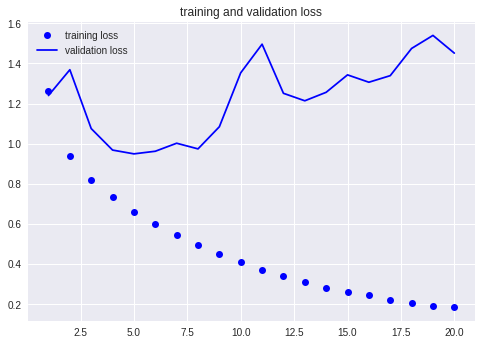

10000/10000 [==============================] - 2s 216us/step
Model, accuracy: 68.38%


In [0]:
if notrained:
  model=model_simpler()
  (history,file_name)=model_compile_and_fit(model,train_images_norm,train_labels_norm,val_images_norm,val_labels_norm,'simpler',batch_size,num_epoch)
  #files.download(file_name)
  
  model_plot(history)
  model_load_evaluate(file_name,test_images_norm,test_labels_norm)
else:
  file_name='model_hold_out_simpler.h5'
  model_download_evaluate(file_name,test_images_norm,test_labels_norm)

In [0]:
files.download(file_name)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 4, 4, 128)         147584    
__________

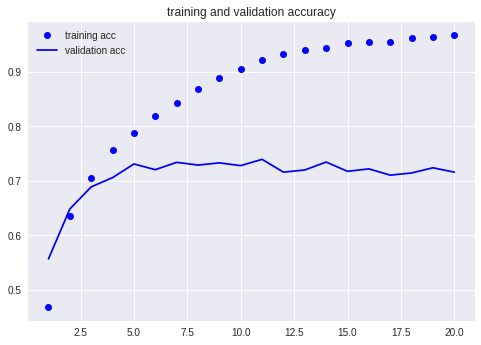

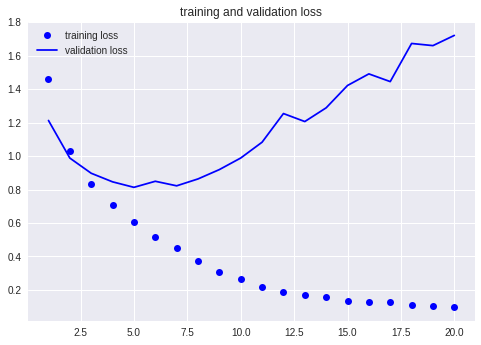

10000/10000 [==============================] - 3s 267us/step
Model, accuracy: 73.29%


In [0]:
if notrained:
  model=model_basic()
  (history,file_name)=model_compile_and_fit(model,train_images_norm,train_labels_norm,val_images_norm,val_labels_norm,'basic',batch_size,num_epoch)
  model_plot(history)
  model_load_evaluate(file_name,test_images_norm,test_labels_norm)
 
else:
  file_name='model_hold_out_basic.h5'
  model_download_evaluate(file_name,test_images_norm,test_labels_norm)

In [0]:
files.download(file_name)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_20 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 128)         73856     
__________

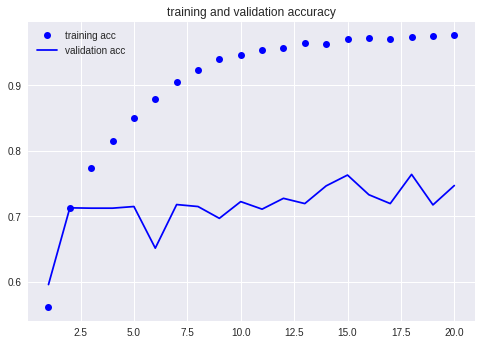

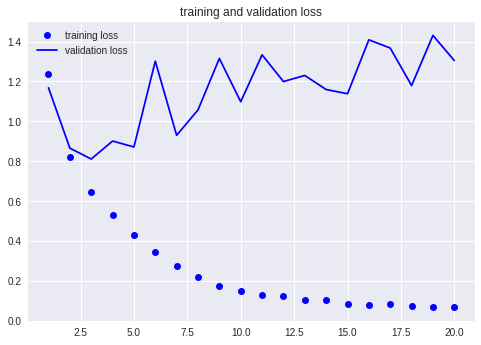

10000/10000 [==============================] - 3s 293us/step
Model, accuracy: 75.05%


In [0]:
if notrained:
  model=model_basic_batchnorm()
  (history,file_name)=model_compile_and_fit(model,train_images_norm,train_labels_norm,val_images_norm,val_labels_norm,'basic_batchnorm',batch_size,num_epoch)
  model_plot(history)
  model_load_evaluate(file_name,test_images_norm,test_labels_norm)
  
else:
  file_name='model_hold_out_basic_batchnorm.h5'
  model_download_evaluate(file_name,test_images_norm,test_labels_norm)

In [0]:
 files.download(file_name)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_24 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_25 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 128)         73856     
__________

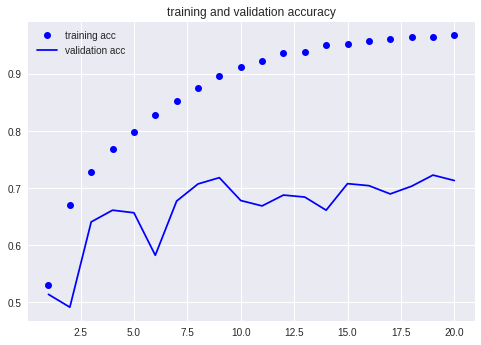

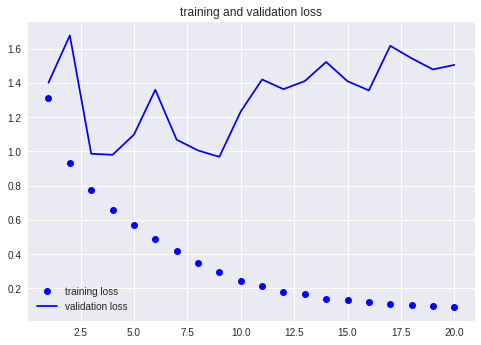

10000/10000 [==============================] - 3s 322us/step
Model, accuracy: 72.28%


In [0]:
if notrained:
  model=model_basic_batchnorm_strides()
  (history,file_name)=model_compile_and_fit(model,train_images_norm,train_labels_norm,val_images_norm,val_labels_norm,'basic_batchnorm_strides',batch_size,num_epoch)
  model_plot(history)
  model_load_evaluate(file_name,test_images_norm,test_labels_norm)
  
else:
  file_name='model_hold_out_basic_batchnorm_strides.h5'
  model_download_evaluate(file_name,test_images_norm,test_labels_norm)

In [0]:
  files.download(file_name)

## Problem 1 Comparison- Simple hold-out validation

For comparison we will try different architectures, and finally choose the one that performs better:

* Simpler model -M1
* Deeper model -M2 (M1 + more layers)
* M2 with more filters + matpooling + same pading - M2_1
* M2_1 + batch normalization -M2_2
* M2_2 + strides -M2_3
* M2_2 + dropout -M2_4
* M2_2 + weight_regularization -M2_5
* M2_4  +more conv layers- M2_6
* M2_6 +data augmentation -M2_7


I use dropout only on fully-connected layers, and implement batch normalization between convolutions, weight regularization in convolutional layers does not perform much better, and using strides performs worse than previous implementations. After trying several different architectures, I choosed the one that performs best of the validation set.

In [0]:
notrained=1
batch_size=64
num_epoch=25
(train_images_norm,train_labels_norm,val_images_norm,val_labels_norm)=split_data(train_images,train_labels)
historys=[]

### 1

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                802848    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 808,266
Trainable params: 808,266
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 40000 s

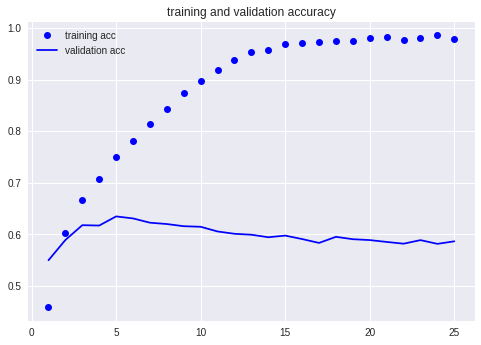

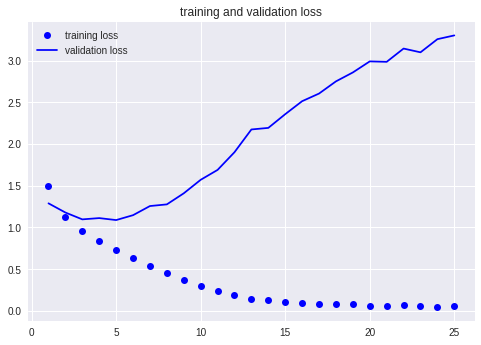

10000/10000 [==============================] - 1s 104us/step
Model, accuracy: 58.74%


In [4]:
#M1
if notrained:
  model=M1()
  (history,file_name)=model_compile_and_fit(model,train_images_norm,train_labels_norm,val_images_norm,val_labels_norm,'M1',batch_size,num_epoch)
  #files.download(file_name)
  historys.append(history)
  model_plot(history)
  model_load_evaluate(file_name,test_images_norm,test_labels_norm)
else:
  file_name='M1.h5'
  model_download_evaluate(file_name,test_images_norm,test_labels_norm)

In [0]:
if notrained:
  files.download(file_name)

### 2

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1179680   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total para

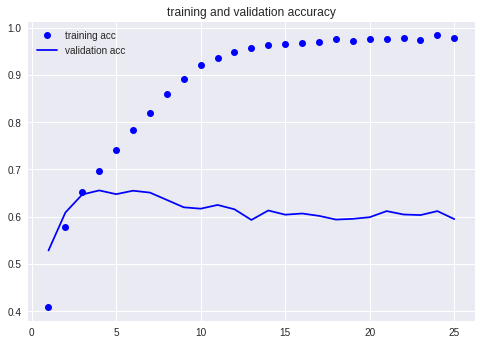

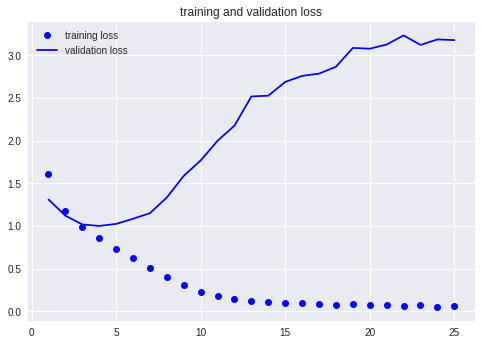

10000/10000 [==============================] - 2s 151us/step
Model, accuracy: 60.12%


In [6]:
#M2
if notrained:
  model=M2()
  (history,file_name)=model_compile_and_fit(model,train_images_norm,train_labels_norm,val_images_norm,val_labels_norm,'M2',batch_size,num_epoch)
  #files.download(file_name)
  historys.append(history)
  model_plot(history)
  model_load_evaluate(file_name,test_images_norm,test_labels_norm)
else:
  file_name='M2.h5'
  model_download_evaluate(file_name,test_images_norm,test_labels_norm)

In [0]:
if notrained:
  files.download(file_name)

### 3

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 128)         73856     
__________

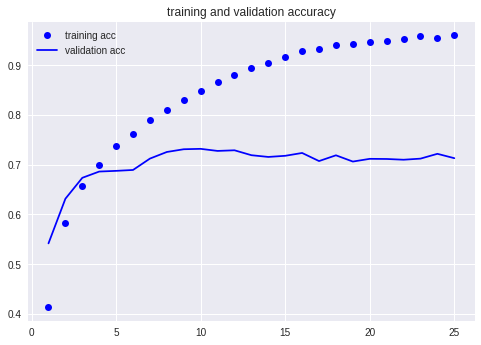

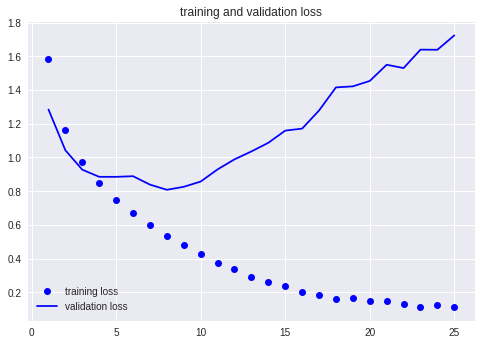

10000/10000 [==============================] - 1s 125us/step
Model, accuracy: 70.84%


In [8]:
#M2_1
if notrained:
  model=M2_1()
  (history,file_name)=model_compile_and_fit(model,train_images_norm,train_labels_norm,val_images_norm,val_labels_norm,'M2_1',batch_size,num_epoch)
  #files.download(file_name)
  historys.append(history)
  model_plot(history)
  model_load_evaluate(file_name,test_images_norm,test_labels_norm)
else:
  file_name='M2_1.h5'
  model_download_evaluate(file_name,test_images_norm,test_labels_norm)

In [0]:
if notrained:
  files.download(file_name)

### 4

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 64)          36928     
__________

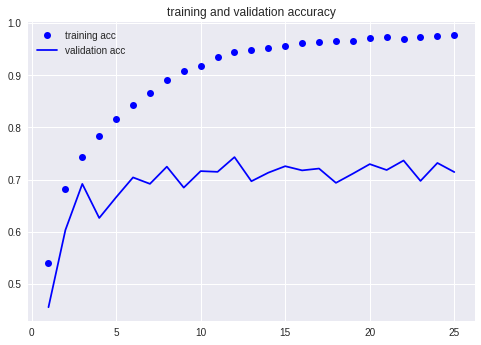

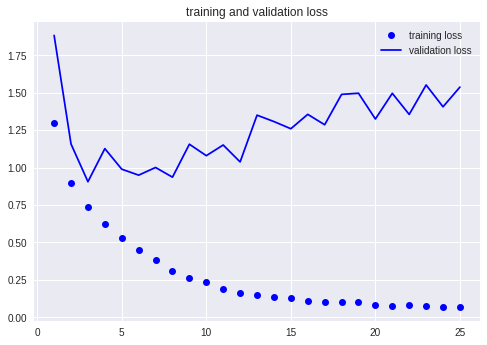

10000/10000 [==============================] - 2s 190us/step
Model, accuracy: 72.01%


In [10]:
#M2_2
if notrained:
  model=M2_2()
  (history,file_name)=model_compile_and_fit(model,train_images_norm,train_labels_norm,val_images_norm,val_labels_norm,'M2_2',batch_size,num_epoch)
  #files.download(file_name)
  historys.append(history)
  model_plot(history)
  model_load_evaluate(file_name,test_images_norm,test_labels_norm)
else:
  file_name='M2_2.h5'
  model_download_evaluate(file_name,test_images_norm,test_labels_norm)

In [0]:
if notrained:
  files.download(file_name)

### 5

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 64)          36928     
__________

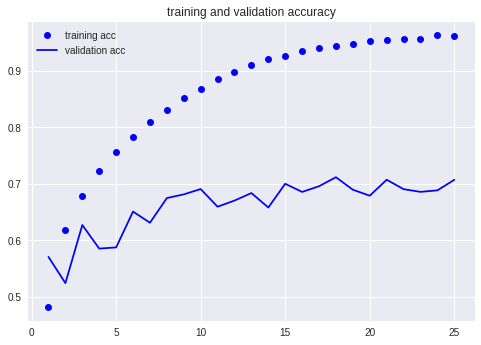

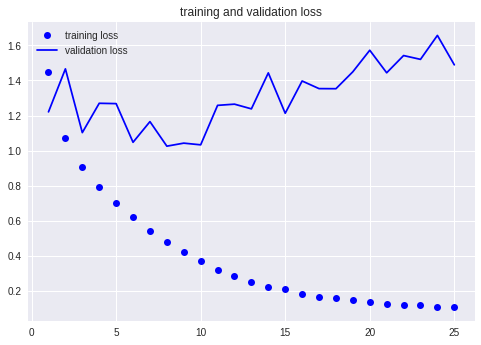

10000/10000 [==============================] - 2s 215us/step
Model, accuracy: 71.29%


In [12]:
#M2_3
if notrained:
  model=M2_3()
  (history,file_name)=model_compile_and_fit(model,train_images_norm,train_labels_norm,val_images_norm,val_labels_norm,'M2_3',batch_size,num_epoch)
  #files.download(file_name)
  historys.append(history)
  model_plot(history)
  model_load_evaluate(file_name,test_images_norm,test_labels_norm)
else:
  file_name='M2_3.h5'
  model_download_evaluate(file_name,test_images_norm,test_labels_norm)

In [0]:
if notrained:
  files.download(file_name)

### 6

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_12 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 64)          0         
___________________________

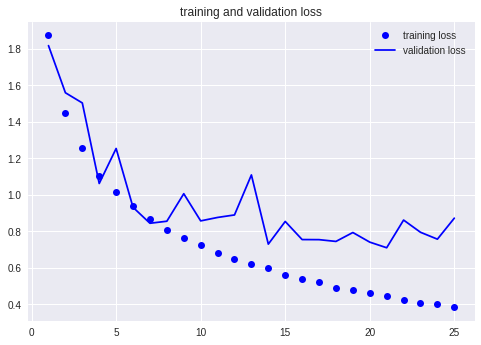

10000/10000 [==============================] - 2s 234us/step
Model, accuracy: 73.53%


In [14]:
#M2_4
if notrained:
  model=M2_4()
  (history,file_name)=model_compile_and_fit(model,train_images_norm,train_labels_norm,val_images_norm,val_labels_norm,'M2_4',batch_size,num_epoch)
  #files.download(file_name)
  historys.append(history)
  model_plot(history)
  model_load_evaluate(file_name,test_images_norm,test_labels_norm)
else:
  file_name='M2_4.h5'
  model_download_evaluate(file_name,test_images_norm,test_labels_norm)

In [0]:
if notrained:
  files.download(file_name)

### 7

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_16 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 8, 64)          36928     
__________

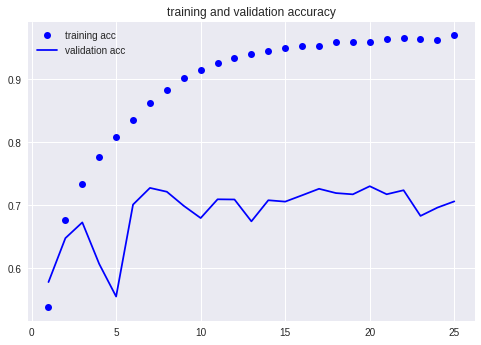

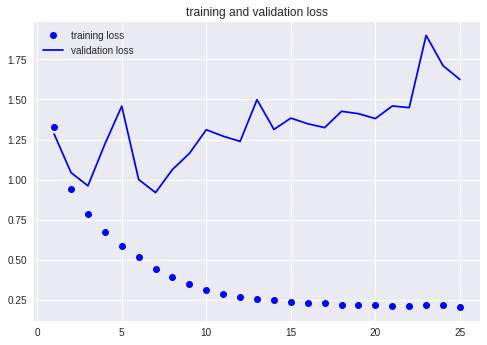

10000/10000 [==============================] - 3s 285us/step
Model, accuracy: 71.40%


In [16]:
#M2_5
if notrained:
  model=M2_5()
  (history,file_name)=model_compile_and_fit(model,train_images_norm,train_labels_norm,val_images_norm,val_labels_norm,'M2_5',batch_size,num_epoch)
  #files.download(file_name)
  historys.append(history)
  model_plot(history)
  model_load_evaluate(file_name,test_images_norm,test_labels_norm)
else:
  file_name='M2_5.h5'
  model_download_evaluate(file_name,test_images_norm,test_labels_norm)

In [0]:
if notrained:
  files.download(file_name)

### 8

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 64)        36928     
__________

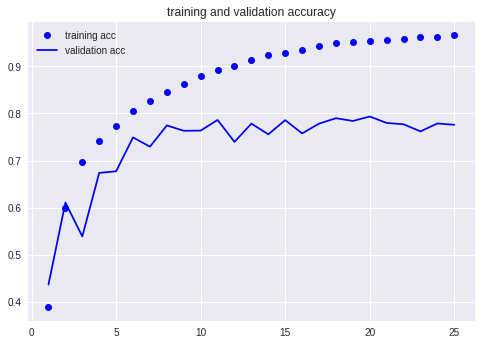

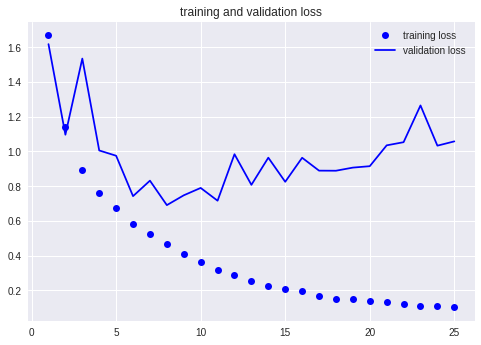

10000/10000 [==============================] - 4s 400us/step
Model, accuracy: 77.86%


In [18]:
#M2_6
if notrained:
  model=M2_6()
  (history,file_name)=model_compile_and_fit(model,train_images_norm,train_labels_norm,val_images_norm,val_labels_norm,'M2_6',batch_size,num_epoch)
  #files.download(file_name)
  historys.append(history)
  model_plot(history)
  model_load_evaluate(file_name,test_images_norm,test_labels_norm)
else:
  file_name='M2_6.h5'
  model_download_evaluate(file_name,test_images_norm,test_labels_norm)

In [0]:
if notrained:
  files.download(file_name)

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 [==============================] - 47s 1ms/step - loss: 1.5857 - acc: 0.4677 - val_loss: 1.3920 - val_acc: 0.5030
Epoch 2/25
40000/40000 [==============================] - 35s 884us/step - loss: 1.0175 - acc: 0.6388 - val_loss: 0.9796 - val_acc: 0.6548
Epoch 3/25
40000/40000 [==============================] - 35s 884us/step - loss: 0.8151 - acc: 0.7127 - val_loss: 0.8600 - val_acc: 0.7015
Epoch 4/25
40000/40000 [==============================] - 35s 883us/step - loss: 0.6988 - acc: 0.7552 - val_loss: 1.5959 - val_acc: 0.5538
Epoch 5/25
40000/40000 [==============================] - 35s 884us/step - loss: 0.6053 - acc: 0.7846 - val_loss: 0.7743 - val_acc: 0.7370
Epoch 6/25
40000/40000 [==============================] - 35s 884us/step - loss: 0.5309 - acc: 0.8132 - val_loss: 0.8002 - val_acc: 0.7303
Epoch 7/25
40000/40000 [==============================] - 35s 886us/step - loss: 0.4650 - acc: 0.8352 - val_loss: 0.87

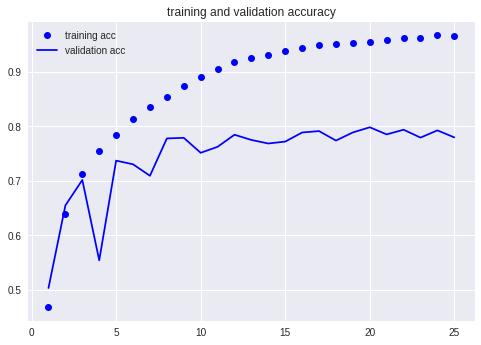

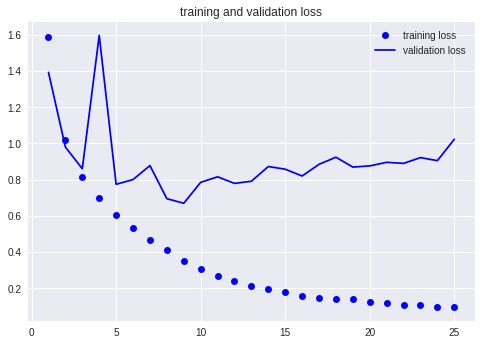

10000/10000 [==============================] - 9s 856us/step
Model, accuracy: 78.17%


In [66]:
#M2_7
if notrained:
  model=M2_7()
  (history,file_name)=model_compile_and_fit(model,train_images_norm,train_labels_norm,val_images_norm,val_labels_norm,'M2_7',batch_size,num_epoch)
  #files.download(file_name)
  historys.append(history)
  model_plot(history)
  model_load_evaluate(file_name,test_images_norm,test_labels_norm)
else:
  file_name='M2_7.h5'
  model_download_evaluate(file_name,test_images_norm,test_labels_norm)

In [53]:
if notrained:
  rowss=len(historys)
  t=np.zeros((rowss,5))
  for i in range(0,rowss):
    hist=historys[i].history
    (train_loss,train_acc,val_loss,valn_ac)=(hist['loss'],hist['acc'],hist['val_loss'],hist['val_acc'])
    t[i,1:]=(train_loss[-1],train_acc[-1],val_loss[-1],valn_ac[-1])
    t[i,0]=i+1
  headers = ["model", "train_loss", "train_acc", "val_loss", "val_acc"]
  table = tabulate(t, headers, tablefmt="fancy_grid")
  # output
  print(table)
else:
  (train_loss,train_acc,val_loss,valn_ac)=model_download_getmetrics(file_name,train_images_norm,train_labels_norm,val_images_norm,val_labels_norm)

╒═════════╤══════════════╤═════════════╤════════════╤═══════════╕
│   model │   train_loss │   train_acc │   val_loss │   val_acc │
╞═════════╪══════════════╪═════════════╪════════════╪═══════════╡
│       1 │    0.0599311 │    0.979225 │   3.30336  │    0.5862 │
├─────────┼──────────────┼─────────────┼────────────┼───────────┤
│       2 │    0.0599441 │    0.97905  │   3.17644  │    0.5951 │
├─────────┼──────────────┼─────────────┼────────────┼───────────┤
│       3 │    0.11124   │    0.96035  │   1.7247   │    0.7133 │
├─────────┼──────────────┼─────────────┼────────────┼───────────┤
│       4 │    0.0678045 │    0.976125 │   1.53695  │    0.7144 │
├─────────┼──────────────┼─────────────┼────────────┼───────────┤
│       5 │    0.105563  │    0.9629   │   1.48933  │    0.7072 │
├─────────┼──────────────┼─────────────┼────────────┼───────────┤
│       6 │    0.384729  │    0.86865  │   0.872614 │    0.7345 │
├─────────┼──────────────┼─────────────┼────────────┼───────────┤
│       7 

In [0]:
if notrained:
  np.save("history_mmodels.npy", historys)
  files.download("history_mmodels.npy")


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_52 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 16, 16, 64)        36928     
__________

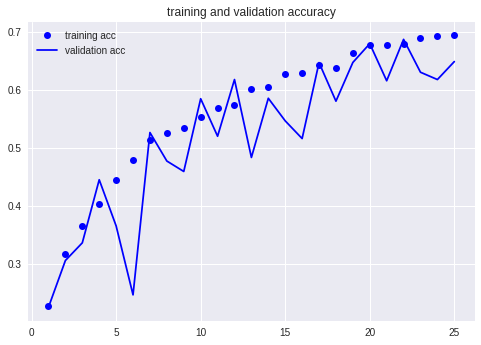

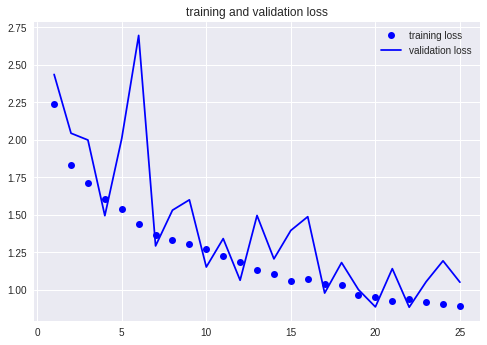

10000/10000 [==============================] - 7s 680us/step
Model, accuracy: 65.41%


In [58]:
#M2_7
# data generator. Add data augmentation
datagen = ImageDataGenerator(
    #rescale=1./255,
    #rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    #shear_range=0.1,
    #zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
  
if notrained:
  model=M2_6()
  (history,file_name)=model_compile_and_fitgenerator(model,train_images_norm,train_labels_norm,val_images_norm,val_labels_norm,'M2_7',datagen,batch_size,num_epoch)
  #files.download(file_name)
  #historys.append(history)
  model_plot(history)
  model_load_evaluate(file_name,test_images_norm,test_labels_norm)
else:
  file_name='M2_7.h5'
  model_download_evaluate(file_name,test_images_norm,test_labels_norm)

## Problem 1 Final Solution- Simple hold-out validation

In [0]:
notrained=1
batch_size=64
num_epoch=100
(train_images_norm,train_labels_norm,val_images_norm,val_labels_norm)=split_data(train_images,train_labels)

In [0]:
test_images_norm = (test_images/255).astype('float32')
test_labels_norm = np_utils.to_categorical(test_labels, 10)

## 2- k-fold validation

Reevaluate your best architecture using k-fold validation with k=5, that is, the size of the validation fold is 20%. Does the accuracy/loss obtain by k-fold validation differ from the accuracy/loss obtain by simple hold-out validation.

In [0]:
notrained=1
batch_size=64
num_epoch=25
train_images_norm_all = (train_images/255).astype('float32')
train_labels_norm_all = np_utils.to_categorical(train_labels, 10)
historys_kfold=[]

In [0]:
def kfold_split(X, num_split=5):
    X_size = X.shape[0]
    test_size = int(X_size / num_split)
    index = np.arange(X_size)
    
    for test_start in np.arange(0,X_size,test_size):
        mask = np.zeros(X_size, dtype=bool)
        mask[test_start:(test_start+test_size)] = True
        
        # yield train, validation sets
        yield index[np.logical_not(mask)], index[mask]

In [0]:
fold_generator = kfold_split(train_images_norm, 5)

In [0]:
# data generator. Add data augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [0]:
# test model with one fold (hold out)
(train_index, valid_index) = next(fold_generator)
model=M2_7()
(history,file_name)=model_compile_and_fitgenerator(model,train_images_norm_all[train_index],train_labels_norm_all[train_index],
                                                   train_images_norm_all[valid_index],train_labels_norm_all[valid_index],'M2_7_kfold',datagen,batch_size,num_epoch)


In [0]:
# now train the other folds (kfold)
for (train_index, valid_index) in fold_gen:
    print("Training next fold...")
    model = get_model()
    history = model.fit_generator(
        datagen.flow(train_images[train_index], train_labels[train_index], batch_size=BATCH),
        validation_data=(train_images[valid_index], train_labels[valid_index]),
        epochs=EPOCHS,
        use_multiprocessing=True,
        workers=4,
        verbose=0
    )
    models.append(model)
    results.append(history.history)
    print("Fold {} Results:".format(len(results)))
    print(" - Training Loss: {}, Validation Loss: {}".format(np.min(results[-1]["loss"]),np.min(results[-1]["val_loss"])))
    print(" - Training Acc: {}, Validation Acc: {}".format(np.max(results[-1]["acc"]),np.max(results[-1]["val_acc"])))    
    print("")

## Problem 2 Final Solution- k-fold validation